In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import dlib



In [ ]:
!git clone https://github.com/Toteja/Headphones_Dataset

Cloning into 'Headphones_Dataset'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 320 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (320/320), 24.66 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import os

main_dir = "/content/Headphones_Dataset"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "Train")
test_dir = os.path.join(main_dir, "Test")

#SETING DIRECTORY FOR HEADPHONES AND WITHOUT HEADPHONES IMAGES DIRECTORY
train_head_dir = os.path.join(train_dir, "With_Headphones")
train_normal_dir = os.path.join(train_dir, "Without_Headphones")

test_head_dir = os.path.join(test_dir, "With_Headphones")
test_normal_dir = os.path.join(test_dir, "Without_Headphones")

In [ ]:
train_head_names = os.listdir(train_head_dir)
train_normal_names = os.listdir(train_normal_dir)

test_head_names = os.listdir(test_head_dir)
test_normal_names = os.listdir(test_normal_dir)

['/content/Headphones_Dataset/Train/With_Headphones/images (9).jfif', '/content/Headphones_Dataset/Train/With_Headphones/1-2.jpg', '/content/Headphones_Dataset/Train/With_Headphones/maxresdefault.jpg', '/content/Headphones_Dataset/Train/With_Headphones/knowcalm-4-500x500.jpg', '/content/Headphones_Dataset/Train/With_Headphones/images (3).jpg', '/content/Headphones_Dataset/Train/With_Headphones/images (1).jpg', '/content/Headphones_Dataset/Train/With_Headphones/pexels-photo-3761461.jpeg', '/content/Headphones_Dataset/Train/With_Headphones/images (7).jfif']
['/content/Headphones_Dataset/Train/Without_Headphones/1 (6908).jpg', '/content/Headphones_Dataset/Train/Without_Headphones/1 (6975).jpg', '/content/Headphones_Dataset/Train/Without_Headphones/1 (6899).jpg', '/content/Headphones_Dataset/Train/Without_Headphones/1 (6958).jpg', '/content/Headphones_Dataset/Train/Without_Headphones/1 (6930).jpg', '/content/Headphones_Dataset/Train/Without_Headphones/maxresdefault.jpg', '/content/Headphon

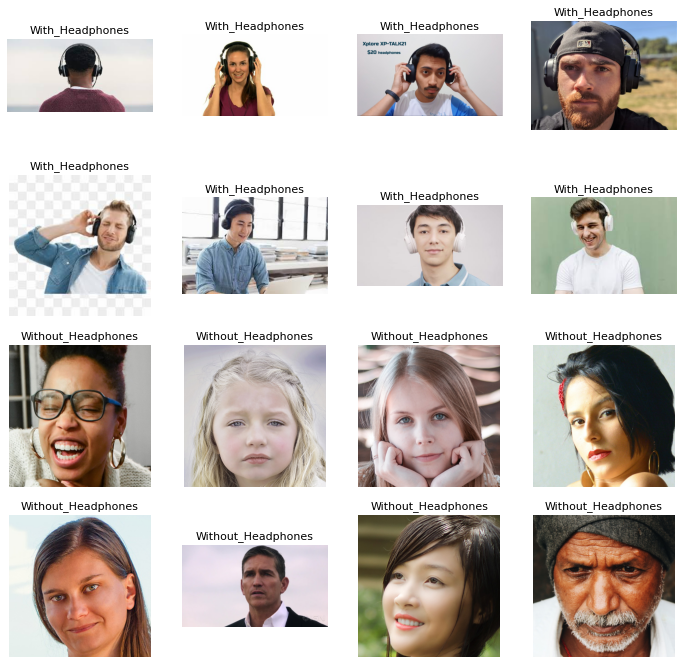

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

head_img = [os.path.join(train_head_dir, filename) for filename in train_head_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(head_img)
print(normal_img)

merged_img = head_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[4]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [ ]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")




Found 161 images belonging to 2 classes.
Found 39 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [ ]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'With_Headphones': 0, 'Without_Headphones': 1}
Image shape is :  (150, 150, 3)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 35,
                    validation_data = validation_generator)

Epoch 1/35
6/6 [==============================] - 17s 3s/step - loss: 6.3215 - accuracy: 0.4534 - val_loss: 0.6901 - val_accuracy: 0.5897
Epoch 2/35
6/6 [==============================] - 15s 2s/step - loss: 0.7733 - accuracy: 0.5776 - val_loss: 0.6919 - val_accuracy: 0.5897
Epoch 3/35
6/6 [==============================] - 15s 2s/step - loss: 0.7000 - accuracy: 0.4720 - val_loss: 0.6912 - val_accuracy: 0.6154
Epoch 4/35
6/6 [==============================] - 17s 3s/step - loss: 0.6928 - accuracy: 0.5466 - val_loss: 0.6910 - val_accuracy: 0.5897
Epoch 5/35
6/6 [==============================] - 15s 2s/step - loss: 0.6897 - accuracy: 0.5839 - val_loss: 0.6904 - val_accuracy: 0.5897
Epoch 6/35
6/6 [==============================] - 15s 2s/step - loss: 0.6877 - accuracy: 0.5839 - val_loss: 0.6897 - val_accuracy: 0.5897
Epoch 7/35
6/6 [==============================] - 15s 2s/step - loss: 0.6900 - accuracy: 0.5839 - val_loss: 0.6891 - val_accuracy: 0.5897
Epoch 8/35
6/6 [==================

Text(0.5, 0, 'epoch')

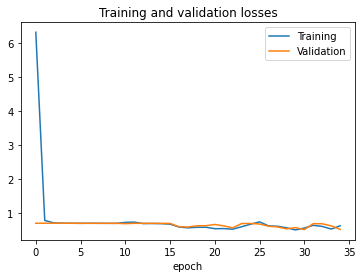

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

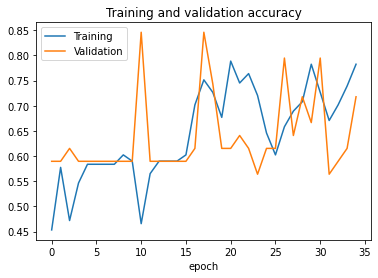

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

1/1 [==============================] - 1s 910ms/step - loss: 0.4333 - accuracy: 0.8065
Test Set Loss :  0.4333014190196991
Test Set Accuracy :  0.8064516186714172


In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  
  if prediction == 0:
    print("HEADPHONES DETECTED")
  else:
    print("NO HEADPHONES DETECTED")

Saving my_content.jpg to my_content (1).jpg
NO HEADPHONES DETECTED


In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data






def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img




In [ ]:
cap = cv2.VideoCapture(0)
video_stream()

label_html = "Detecting ..."
bbox = ''
count = 0 
detector = dlib.get_frontal_face_detector()

i = 0

while i>=0:
  
  js_reply = video_frame(label_html, bbox)
  if not js_reply:
      break

   
  frame = js_to_image(js_reply["img"])

  gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('temp.jpg', gray1)
  img = cv2.imread('temp.jpg')

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

  # Detect faces
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  # Draw rectangle around the faces and crop the faces
  for (x, y, w, h) in faces:
	  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
	  faces = img[y:y + h, x:x + w]
	
	  cv2.imwrite('face.jpg', faces)

 
  
  
  
  if i%2!=0:
    cv2.putText(frame, "HEADPHONES DETECTED", (100, 53), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),
						2)
  else:
    cv2.putText(frame, "NO HEADPHONES DETECTED", (100, 53), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),
						2)

  
  
  
  cv2_imshow(frame)
  i+=1

if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

In [ ]:
model.save("Pretrained_model.h5")